In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1  # 特征数量
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

# 计算最佳拟合直线
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat  # 矩阵乘法
    if linalg.det(xTx) == 0.0:  # 判断行列式是否为0
        print('This matrix is singular, cannot do inverse')
        return
    ws = xTx.I * (xMat.T * yMat)  # mat.I表示逆运算
    return ws

In [3]:
xArr, yArr = loadDataSet('ex0.txt')

In [4]:
xArr[0: 2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [5]:
ws = standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [6]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

In [7]:
import matplotlib.pyplot as plt

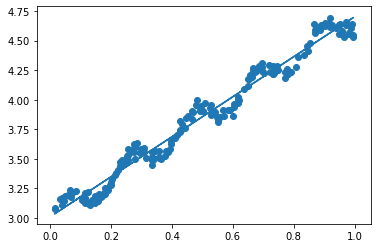

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

# flatten是numpy.ndarray.flatten的一个函数，即将numpy对象降为一维。
# numpy对象.A（等效于numpy对象.getA()）变成了数组
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])

xCopy = xMat.copy()
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)

plt.show()

In [9]:
yHat = xMat * ws
corrcoef(yHat.T, yMat)  # 计算两两组合的相关系数

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [10]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))  # 创建单位对角矩阵
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = exp(diffMat * diffMat.T / (-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [11]:
xArr, yArr = loadDataSet('ex0.txt')
yArr[0]

3.176513

In [12]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [13]:
yHat = lwlrTest(xArr, xArr, yArr, 0.01)

In [14]:
xMat == mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]

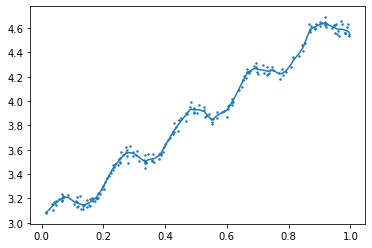

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])

ax.scatter(xMat[:, 1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2)
plt.show()

# 实例：预测鲍鱼的年龄

In [16]:
def reeError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [17]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 0.1)
yHat1 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 1)
yHat10 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 10)

In [18]:
reeError(abY[0: 99], yHat01.T)

56.825235689362394

In [19]:
reeError(abY[0: 99], yHat1.T)

429.8905618700943

In [20]:
reeError(abY[0: 99], yHat10.T)

549.1181708827294

In [21]:
# 

In [22]:
yHat01 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 0.1)
reeError(abY[100: 199], yHat01.T)

35709.281008018035

In [23]:
yHat1 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 1)
reeError(abY[100: 199], yHat1.T)

573.5261441893857

In [24]:
yHat10 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 10)
reeError(abY[100: 199], yHat10.T)

517.5711905386906

In [25]:
ws = standRegres(abX[0: 99], abY[0:99])
yHat = mat(abX[100: 199]) * ws
reeError(abY[100: 199], yHat.T.A)

518.6363153250859

### 岭回归

In [26]:
# 用于计算回归系数
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(denom) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    
    yMean = mean(yMat, 0)  # axis=0返回纵轴的平均值，axis=1返回横轴的平均值
    yMat = yMat - yMean
    
    xMeans = mean(xMat, 0)
    xVar = var(xMat, 0)  # 计算方差
    xMat = (xMat - xMeans) / xVar
    
    numTestPts = 30  # 设置30个回归系数
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i, :] = ws.T
    return wMat

In [27]:
abX, abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX, abY)

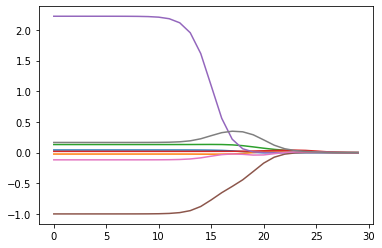

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()  # 横坐标是lambda值

### 前向逐步线性回归

In [29]:
#对数据进行标准化处理
def regularize(xMat): 
    inMat = xMat.copy()
    inMeans = mean(inMat,0) 
    inVar = var(inMat,0)
    inMat = (inMat-inMeans)/inVar
    return inMat 

# 前向逐步线性回归
# 参数：输入数据，预测变量，步长，迭代次数
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    
    m, n = shape(xMat)
    returnMat = zeros((numIt, n))
    ws = zeros((n, 1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):  # 迭代numIt次
        print(ws.T)
        lowestError = inf
        for j in range(n):  # 遍历每条数据
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = reeError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T
    return returnMat

In [30]:
xArr, yArr = loadDataSet('abalone.txt')
stageWise(xArr, yArr, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]


array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [31]:
stageWise(xArr, yArr, 0.001, 5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[0.    0.    0.005 0.053 0.    0.    0.    0.095]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.096]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.097]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.099]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.1  ]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.101]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.103]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.104]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.106]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.107]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.108]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.109]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.109]]
[[0.    0.  

[[ 0.     0.     0.005  0.043  0.    -0.098  0.     0.19 ]]
[[ 0.     0.     0.005  0.043  0.    -0.098  0.     0.191]]
[[ 0.     0.     0.005  0.043  0.    -0.099  0.     0.191]]
[[ 0.     0.     0.005  0.043  0.    -0.1    0.     0.191]]
[[ 0.     0.     0.005  0.043  0.    -0.1    0.     0.192]]
[[ 0.     0.     0.005  0.043  0.    -0.101  0.     0.192]]
[[ 0.     0.     0.005  0.043  0.    -0.101  0.     0.193]]
[[ 0.     0.     0.005  0.043  0.    -0.102  0.     0.193]]
[[ 0.     0.     0.005  0.043  0.    -0.103  0.     0.193]]
[[ 0.     0.     0.005  0.043  0.    -0.103  0.     0.194]]
[[ 0.     0.     0.005  0.043  0.    -0.104  0.     0.194]]
[[ 0.     0.     0.005  0.043  0.    -0.104  0.     0.195]]
[[ 0.     0.     0.005  0.043  0.    -0.105  0.     0.195]]
[[ 0.     0.     0.005  0.043  0.    -0.106  0.     0.195]]
[[ 0.     0.     0.005  0.043  0.    -0.106  0.     0.196]]
[[ 0.     0.     0.005  0.043  0.    -0.107  0.     0.196]]
[[ 0.     0.     0.005  0.043  0.    -0.

[[ 0.     0.     0.024  0.039  0.    -0.209  0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.21   0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.212  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.214  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.215  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.215  0.     0.247]]
[[ 0.     0.     0.025  0.039  0.    -0.216  0.     0.247]]
[[ 0.     0.     0.025  0.039  0.    -0.217  0.     0.247]]
[[ 0.     0.     0.026  0.039  0.    -0.217  0.     0.247]]
[[ 0.     0.     0.026  0.039  0.    -0.218  0.     0.247]]
[[ 0.     0.     0.026  0.039  0.    -0.219  0.     0.247]]
[[ 0.     0.     0.026  0.039  0.    -0.219  0.     0.248]]
[[ 0.     0.     0.026  0.039  0.    -0.

[[ 0.     0.     0.053  0.034  0.    -0.323  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.324  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.325  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.325  0.     0.291]]
[[ 0.     0.     0.053  0.034  0.    -0.326  0.     0.291]]
[[ 0.     0.     0.053  0.034  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.054  0.034  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.054  0.033  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.055  0.033  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.055  0.033  0.    -0.327  0.     0.292]]
[[ 0.     0.     0.055  0.033  0.    -0.328  0.     0.292]]
[[ 0.     0.     0.055  0.033  0.    -0.328  0.     0.293]]
[[ 0.     0.     0.055  0.033  0.    -0.329  0.     0.293]]
[[ 0.     0.     0.055  0.033  0.    -0.33   0.     0.293]]
[[ 0.     0.     0.056  0.033  0.    -0.33   0.     0.293]]
[[ 0.     0.     0.056  0.033  0.    -0.331  0.     0.293]]
[[ 0.     0.     0.056  0.033  0.    -0.

[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.439  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.441  0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.442  0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.442  0.     0.338]]
[[ 0.     0.     0.084  0.028  0.    -0.443  0.     0.338]]
[[ 0.     0.     0.084  0.028  0.    -0.444  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.444  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.445  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.446  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.446  0.     0.339]]
[[ 0.     0.     0.085  0.028  0.    -0.447  0.     0.339]]
[[ 0.     0.     0.085  0.028  0.    -0.447  0.     0.34 ]]
[[ 0.     0.     0.085  0.028  0.    -0.

[[ 0.     0.     0.108  0.024  0.024 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.025 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.026 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.026 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.027 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.028 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.028 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.029 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.03  -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.031 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.031 -0.55   0.     0.374]]
[[ 0.     0.     0.108  0.024  0.032 -0.55   0.     0.374]]
[[ 0.     0.     0.108  0.024  0.033 -0.55   0.     0.374]]
[[ 0.     0.     0.108  0.024  0.033 -0.551  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.034 -0.551  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.035 -0.551  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.035 -0.

[[ 0.004  0.     0.11   0.022  0.159 -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.161 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.593 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.163 -0.593 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.164 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.164 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.165 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.165 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.166 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.167 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.168 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.169 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.169 -0.594 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.17  -0.

[[ 0.008  0.     0.11   0.022  0.301 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.302 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.303 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.304 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.305 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.305 -0.621 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.306 -0.621 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.307 -0.621 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.308 -0.621 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.308 -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.309 -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.31  -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.311 -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.311 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.312 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.313 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.314 -0.

[[ 0.011  0.     0.11   0.022  0.441 -0.648 -0.022  0.348]]
[[ 0.011  0.     0.11   0.022  0.441 -0.648 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.442 -0.648 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.443 -0.648 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.444 -0.648 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.444 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.445 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.446 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.448 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.449 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.45  -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.452 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.453 -0.

[[ 0.014  0.     0.11   0.022  0.589 -0.677 -0.03   0.333]]
[[ 0.014  0.     0.11   0.022  0.589 -0.678 -0.03   0.333]]
[[ 0.014  0.     0.11   0.022  0.59  -0.678 -0.03   0.333]]
[[ 0.014  0.     0.11   0.022  0.591 -0.678 -0.03   0.333]]
[[ 0.014  0.     0.11   0.022  0.592 -0.678 -0.03   0.333]]
[[ 0.014  0.     0.11   0.022  0.592 -0.678 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.593 -0.678 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.594 -0.678 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.595 -0.678 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.595 -0.679 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.596 -0.679 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.597 -0.679 -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.597 -0.68  -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.598 -0.68  -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.599 -0.68  -0.03   0.332]]
[[ 0.014  0.     0.11   0.022  0.599 -0.68  -0.03   0.331]]
[[ 0.014  0.     0.11   0.022  0.6   -0.

[[ 0.016  0.     0.11   0.022  0.728 -0.705 -0.037  0.319]]
[[ 0.016  0.     0.11   0.022  0.728 -0.705 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.729 -0.705 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.73  -0.705 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.731 -0.705 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.731 -0.706 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.732 -0.706 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.733 -0.706 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.733 -0.707 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.734 -0.707 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.735 -0.707 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.735 -0.708 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.736 -0.708 -0.037  0.318]]
[[ 0.016  0.     0.11   0.022  0.737 -0.708 -0.037  0.318]]
[[ 0.017  0.     0.11   0.022  0.737 -0.708 -0.037  0.318]]
[[ 0.017  0.     0.11   0.022  0.738 -0.708 -0.037  0.318]]
[[ 0.017  0.     0.11   0.022  0.738 -0.

[[ 0.019  0.     0.11   0.022  0.876 -0.735 -0.045  0.304]]
[[ 0.019  0.     0.11   0.022  0.877 -0.735 -0.045  0.304]]
[[ 0.019  0.     0.11   0.022  0.878 -0.735 -0.045  0.304]]
[[ 0.019  0.     0.11   0.022  0.878 -0.735 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.879 -0.735 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.88  -0.735 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.881 -0.735 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.881 -0.736 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.882 -0.736 -0.045  0.303]]
[[ 0.019  0.     0.11   0.022  0.883 -0.736 -0.045  0.303]]
[[ 0.02   0.     0.11   0.022  0.883 -0.736 -0.045  0.303]]
[[ 0.02   0.     0.11   0.022  0.884 -0.736 -0.045  0.303]]
[[ 0.02   0.     0.11   0.022  0.884 -0.736 -0.046  0.303]]
[[ 0.02   0.     0.11   0.022  0.885 -0.736 -0.046  0.303]]
[[ 0.02   0.     0.11   0.022  0.886 -0.736 -0.046  0.303]]
[[ 0.02   0.     0.11   0.022  0.887 -0.736 -0.046  0.303]]
[[ 0.02   0.     0.11   0.022  0.888 -0.

[[ 0.022  0.     0.11   0.022  1.016 -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.017 -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.018 -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.019 -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.02  -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.02  -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.021 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.022 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.023 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.024 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.024 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.025 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.026 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.026 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.027 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.028 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.028 -0.

[[ 0.025  0.     0.11   0.022  1.159 -0.79  -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.16  -0.79  -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.16  -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.161 -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.162 -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.162 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.163 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.164 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.165 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.165 -0.792 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.166 -0.792 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.167 -0.792 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.168 -0.792 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.168 -0.793 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.169 -0.793 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.17  -0.793 -0.06   0.274]]
[[ 0.025  0.     0.11   0.022  1.17  -0.

[[ 0.028  0.     0.11   0.022  1.306 -0.82  -0.068  0.261]]
[[ 0.028  0.     0.11   0.022  1.307 -0.82  -0.068  0.261]]
[[ 0.028  0.     0.11   0.022  1.307 -0.82  -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.308 -0.82  -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.309 -0.82  -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.31  -0.82  -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.311 -0.82  -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.311 -0.821 -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.312 -0.821 -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.313 -0.821 -0.068  0.26 ]]
[[ 0.028  0.     0.11   0.022  1.313 -0.821 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.314 -0.821 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.315 -0.821 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.316 -0.821 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.316 -0.822 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.317 -0.822 -0.068  0.259]]
[[ 0.028  0.     0.11   0.022  1.318 -0.

[[ 0.031  0.     0.111  0.022  1.445 -0.849 -0.075  0.246]]
[[ 0.031  0.     0.111  0.022  1.446 -0.849 -0.075  0.246]]
[[ 0.032  0.     0.111  0.022  1.446 -0.849 -0.075  0.246]]
[[ 0.032  0.     0.111  0.022  1.447 -0.849 -0.075  0.246]]
[[ 0.032  0.     0.111  0.022  1.447 -0.849 -0.075  0.245]]
[[ 0.032  0.     0.111  0.022  1.448 -0.849 -0.075  0.245]]
[[ 0.032  0.     0.111  0.022  1.449 -0.849 -0.075  0.245]]
[[ 0.032  0.     0.111  0.022  1.45  -0.849 -0.075  0.245]]
[[ 0.032  0.     0.111  0.022  1.45  -0.849 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.451 -0.849 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.452 -0.849 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.453 -0.849 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.454 -0.849 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.454 -0.85  -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.455 -0.85  -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.456 -0.85  -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.456 -0.

   2.38e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.531e+00 -8.660e-01
  -7.900e-02  2.380e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.532e+00 -8.660e-01
  -7.900e-02  2.380e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.532e+00 -8.660e-01
  -7.900e-02  2.370e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.533e+00 -8.660e-01
  -7.900e-02  2.370e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.534e+00 -8.660e-01
  -7.900e-02  2.370e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.535e+00 -8.660e-01
  -7.900e-02  2.370e-01]]
[[ 3.300e-02 -1.000e-03  1.110e-01  2.200e-02  1.535e+00 -8.660e-01
  -8.000e-02  2.370e-01]]
[[ 3.300e-02 -1.000e-03  1.120e-01  2.200e-02  1.535e+00 -8.660e-01
  -8.000e-02  2.370e-01]]
[[ 0.033 -0.002  0.112  0.022  1.535 -0.866 -0.08   0.237]]
[[ 0.033 -0.002  0.112  0.022  1.536 -0.866 -0.08   0.237]]
[[ 0.033 -0.002  0.112  0.022  1.537 -0.866 -0.08   0.237]]
[[ 0.033 -0.002  0.112  0.022  1.538 -0.866 -0.08   0.

[[ 0.036 -0.003  0.113  0.022  1.644 -0.888 -0.085  0.226]]
[[ 0.036 -0.003  0.113  0.022  1.644 -0.888 -0.085  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.645 -0.888 -0.085  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.646 -0.888 -0.085  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.647 -0.888 -0.085  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.648 -0.888 -0.085  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.648 -0.888 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.649 -0.888 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.65  -0.888 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.651 -0.888 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.652 -0.888 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.652 -0.889 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.653 -0.889 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.654 -0.889 -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.654 -0.89  -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.655 -0.89  -0.086  0.225]]
[[ 0.036 -0.003  0.113  0.022  1.656 -0.

[[ 0.038 -0.006  0.116  0.022  1.772 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.773 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.774 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.774 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.775 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.776 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.777 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.778 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.778 -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.779 -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.78  -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.78  -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.781 -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.782 -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.782 -0.915 -0.093  0.211]]
[[ 0.038 -0.006  0.116  0.022  1.783 -0.915 -0.093  0.211]]
[[ 0.038 -0.006  0.116  0.022  1.784 -0.

[[ 0.042 -0.007  0.117  0.022  1.916 -0.943 -0.099  0.198]]
[[ 0.042 -0.007  0.117  0.022  1.916 -0.943 -0.1    0.198]]
[[ 0.042 -0.007  0.117  0.022  1.917 -0.943 -0.1    0.198]]
[[ 0.042 -0.007  0.117  0.022  1.918 -0.943 -0.1    0.198]]
[[ 0.042 -0.007  0.117  0.022  1.919 -0.943 -0.1    0.198]]
[[ 0.042 -0.007  0.117  0.022  1.92  -0.943 -0.1    0.198]]
[[ 0.042 -0.007  0.117  0.022  1.92  -0.943 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.921 -0.943 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.922 -0.943 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.923 -0.943 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.923 -0.944 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.924 -0.944 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.925 -0.944 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.925 -0.945 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.926 -0.945 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.927 -0.945 -0.1    0.197]]
[[ 0.042 -0.007  0.117  0.022  1.928 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [32]:
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regularize(xMat)
yM = mean(yMat, 0)
yMat = yMat - yM
weights = standRegres(xMat, yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

# 预测乐高玩具套装的价格

In [70]:
# 获取数据集
# 来源：https://cuijiahua.com/blog/2017/12/ml_12_regression_2.html
from bs4 import BeautifulSoup

def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    """
    函数说明:从页面读取数据，生成retX和retY列表
    Parameters:
        retX - 数据X
        retY - 数据Y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-12-03
    """
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r = "%d" % i)
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = "%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
#                 print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r = "%d" % i)
         
def setDataCollect(retX, retY):
    """
    函数说明:依次读取六种乐高套装的数据，并生成数据矩阵
    Parameters:
        无
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-12-03
    """
    scrapePage(retX, retY, './lego/lego8288.html', 2006, 800, 49.99)                #2006年的乐高8288,部件数目800,原价49.99
    scrapePage(retX, retY, './lego/lego10030.html', 2002, 3096, 269.99)                #2002年的乐高10030,部件数目3096,原价269.99
    scrapePage(retX, retY, './lego/lego10179.html', 2007, 5195, 499.99)                #2007年的乐高10179,部件数目5195,原价499.99
    scrapePage(retX, retY, './lego/lego10181.html', 2007, 3428, 199.99)                #2007年的乐高10181,部件数目3428,原价199.99
    scrapePage(retX, retY, './lego/lego10189.html', 2008, 5922, 299.99)                #2008年的乐高10189,部件数目5922,原价299.99
    scrapePage(retX, retY, './lego/lego10196.html', 2009, 3263, 249.99)                #2009年的乐高10196,部件数目3263,原价249.99


lgX = []
lgY = []
setDataCollect(lgX, lgY)

商品 #4 没有出售
商品 #11 没有出售
商品 #4 没有出售
商品 #16 没有出售
商品 #18 没有出售
商品 #21 没有出售
商品 #22 没有出售
商品 #2 没有出售
商品 #6 没有出售
商品 #7 没有出售
商品 #9 没有出售
商品 #16 没有出售
商品 #5 没有出售
商品 #6 没有出售
商品 #10 没有出售
商品 #12 没有出售


In [45]:
lgX, lgY

([[2006, 800, 0.0, 49.99],
  [2006, 800, 0.0, 49.99],
  [2006, 800, 0.0, 49.99],
  [2006, 800, 0.0, 49.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 1.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 1.0, 269.99],
  [2002, 3096, 0.0, 269.99],
  [2002, 3096, 1.0, 269.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 0.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 1.0, 499.99],
  [2007, 5195, 1.0, 49

In [46]:
shape(lgX)

(63, 4)

In [47]:
lgX1 = mat(ones((63, 5)))

In [48]:
lgX1[:, 1:5] = mat(lgX)
lgX[0], lgX1[0]

([2006, 800, 0.0, 49.99],
 matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]]))

In [49]:
ws = standRegres(lgX1, lgY)
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

In [58]:
lgX1[0] * ws, lgY[0]

(matrix([[76.07418847]]), 85.0)

In [59]:
lgX1[-1] * ws, lgY[-1]

(matrix([[431.17797666]]), 331.51)

In [60]:
lgX1[43] * ws, lgY[43]

(matrix([[516.20733099]]), 530.0)

In [67]:
# 交叉验证测试岭回归
def crossValidation(xArr, yArr, numVal=10):
    m = len(yArr)
    indexList = list(range(m))
    errorMat = zeros((numVal, 30))
    for i in range(numVal):
        trainX = []
        trainY = []
        testX = []
        testY = []
        random.shuffle(indexList)
        for j in range(m):
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
                
        wMat = ridgeTest(trainX, trainY)
        for k in range(30):
            matTestX = mat(testX)
            matTrainX = mat(trainX)
            meanTrain = mean(matTrainX, 0)
            varTrain = var(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / varTrain
            yEst = matTestX * mat(wMat[k, :]).T + mean(trainY)
            errorMat[i, k] = reeError(yEst.T.A, array(testY))
    meanErrors = mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors == minMean)]
    xMat = mat(xArr)
    yMat = mat(yArr).T
    meanX = mean(xMat, 0)
    varX = var(xMat, 0)
    unReg = bestWeights / varX
    print('the best mode1 from Ridge Regression is: \n', unReg)
    print('with constant term: ', -1 * sum(multiply(meanX, unReg)) + mean(yMat))

In [68]:
crossValidation(lgX, lgY, 10)

the best mode1 from Ridge Regression is: 
 [[-3.17737202e+01 -2.86905354e-03  3.17099911e+01  2.26220223e+00]]
with constant term:  63690.5407401018


In [69]:
ridgeTest(lgX, lgY)  # 查看回归系数变化情况

array([[-1.45288906e+02, -8.39360442e+03, -3.28682450e+00,
         4.42362406e+04],
       [-1.46649725e+02, -1.89952152e+03, -2.80638599e+00,
         4.27891633e+04],
       [-1.44450432e+02,  8.55488076e+02, -1.35089285e+00,
         4.00885735e+04],
       [-1.37402474e+02,  1.64217093e+03,  1.95840783e+00,
         3.44932120e+04],
       [-1.24750588e+02,  1.44326171e+03,  7.62540167e+00,
         2.50647592e+04],
       [-1.10234679e+02,  8.81842164e+02,  1.40617304e+01,
         1.43874420e+04],
       [-9.96484167e+01,  4.17805568e+02,  1.87140361e+01,
         6.66770425e+03],
       [-9.40345090e+01,  1.71289137e+02,  2.10844952e+01,
         2.71206176e+03],
       [-9.11400659e+01,  6.57287394e+01,  2.20487105e+01,
         1.03800465e+03],
       [-8.86246985e+01,  2.45452725e+01,  2.23181664e+01,
         3.87564774e+02],
       [-8.41447674e+01,  9.05861459e+00,  2.21495534e+01,
         1.43313895e+02],
       [-7.44804291e+01,  3.31863501e+00,  2.14607512e+01,
      